In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import json

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
token = {"username":"atharvakarwande12","key":"92640a5728711f097a9282a14af7e7dc"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
# Install Kaggle library
!pip install -q kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d deadskull7/fer2013

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 92% 89.0M/96.6M [00:00<00:00, 66.3MB/s]
100% 96.6M/96.6M [00:00<00:00, 105MB/s] 


In [ ]:
from shutil import unpack_archive
unpack_archive('fer2013.zip', '/content')

In [ ]:
x = pd.read_csv('fer2013.csv')
print (x.values.shape)

(35887, 3)


In [ ]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [ ]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))
print (len(pixels[0]))
print (pixels[10][10])

<class 'numpy.ndarray'>
8287
3


In [ ]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from keras.layers import Dense, Convolution2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Flatten, Dropout, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [ ]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [ ]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [ ]:
x = X

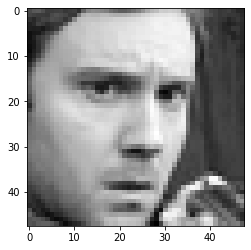

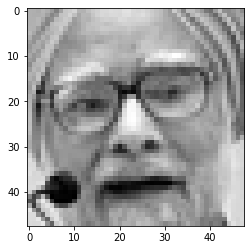

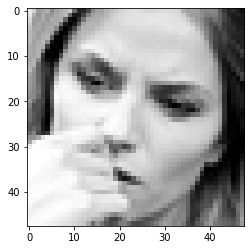

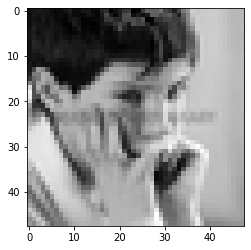

In [ ]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [ ]:
x = x / 255

In [ ]:
x

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [ ]:
X_train = x[0:28710, :]
Y_train = y[0:28710]
print (X_train.shape, Y_train.shape)
X_crossval = x[28710:32300, :]
Y_crossval = y[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(28710, 2304) (28710,)
(3590, 2304) (3590,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 48, 48,1 ))
X_crossval = X_crossval.reshape((X_crossval.shape[0],48, 48,1))

In [ ]:
X_train.shape

(28710, 48, 48, 1)

In [ ]:
print (y.shape)
y_ = np_utils.to_categorical(y, 7)
print (y_.shape)

(35887,)
(35887, 7)


In [ ]:
Y_train = y_[:28710]
Y_crossval = y_[28710:32300]
print (X_crossval.shape, Y_crossval.shape)

(3590, 48, 48, 1) (3590, 7)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=True)  

datagen.fit(X_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import keras
from keras import callbacks

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),  activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(7 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 64)       

In [ ]:
batch_size = 64
epochs = 20

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(X) // batch_size
validation_steps = len((X_crossval, Y_crossval)) // batch_size

In [ ]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[callbacks.ModelCheckpoint(os.path.join('/content/drive/My Drive/NEW_TRF_TASK1','epoch_{epoch:02d}acc{val_accuracy:.4f}.h5'),monitor='val_accuracy', save_weights_only=False, save_best_only=False) ],
                    validation_data=(X_crossval, Y_crossval),
                    epochs = epochs, verbose = 1)

Epoch 1/20
448/448 [==============================] - 436s 973ms/step - loss: 0.4704 - accuracy: 0.2321 - val_loss: 0.3936 - val_accuracy: 0.2577
Epoch 2/20
448/448 [==============================] - 442s 986ms/step - loss: 0.3665 - accuracy: 0.3510 - val_loss: 0.3682 - val_accuracy: 0.2925
Epoch 3/20
448/448 [==============================] - 433s 966ms/step - loss: 0.3187 - accuracy: 0.4569 - val_loss: 0.3077 - val_accuracy: 0.4719
Epoch 4/20
448/448 [==============================] - 435s 970ms/step - loss: 0.2976 - accuracy: 0.4988 - val_loss: 0.3092 - val_accuracy: 0.4741
Epoch 5/20
448/448 [==============================] - 434s 969ms/step - loss: 0.2862 - accuracy: 0.5247 - val_loss: 0.2955 - val_accuracy: 0.5006
Epoch 6/20
448/448 [==============================] - 434s 969ms/step - loss: 0.2765 - accuracy: 0.5422 - val_loss: 0.2739 - val_accuracy: 0.5387
Epoch 7/20
448/448 [==============================] - 435s 970ms/step - loss: 0.2707 - accuracy: 0.5553 - val_loss: 0.2964 -

In [ ]:
weights = model.get_weights()

In [ ]:
np.save('my_model_weights', weights)

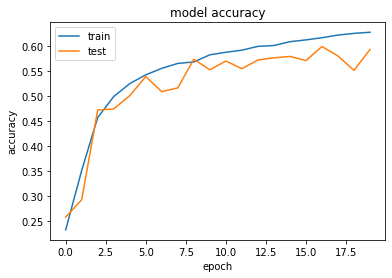

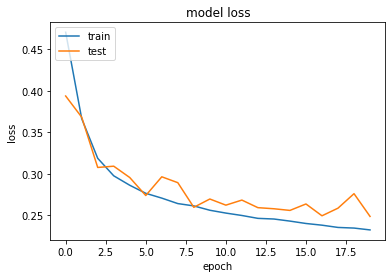

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/NEW_TRF_TASK1/Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/NEW_TRF_TASK1/Losses.png')
plt.show()